In [9]:
import os
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

#print('資料夾下的內容\n',file1)
file1 = os.listdir('mini_newsgroups')


train = []
y=[]

for name in file1:
    path = 'mini_newsgroups/'+ name
    files= os.listdir(path) 
    for file in files: 
         if not os.path.isdir(file): 
              f = open(path+"/"+file,encoding='cp1252'); 
              iter_f = iter(f); 
              str = ""
              for line in iter_f: 
                  str = str + line
              y.append(name)
              train.append(str)
    #print(train) 
    #print(y)
print("completed")

completed


In [10]:
vectorizer = CountVectorizer()
a=vectorizer.fit_transform(train)
#print(a)

#正規化
ttf=TfidfTransformer()
b=ttf.fit_transform(a)
#print(b)


hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 20)
hclust.fit(b.toarray())  #b 需要轉型成陣列
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(b.toarray(), cluster_labels)  #b 需要轉型成陣列
print(silhouette_avg)

-0.005577889594687658


time: 104.262543


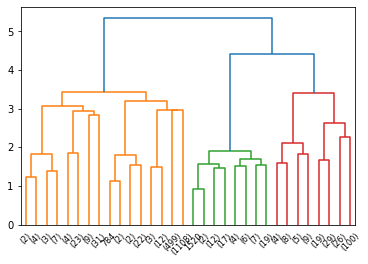

In [11]:
from scipy.cluster import hierarchy
import time
start1 = time.time()
Z = hierarchy.linkage(b.toarray(), method='ward', metric='euclidean')
dendrogram(Z, truncate_mode='level', p=4)
end1 = time.time()
print("time: %f" %(end1-start1))
plt.show()

In [23]:
import collections

In [24]:
def purity(result,label):    # 计算纯度
        total_num = len(label)
        cluster_counter = collections.Counter(result)
        original_counter = collections.Counter(label)
        t=[]
        for k in cluster_counter:
            p_k = []
            for j in original_counter:
                 count = 0
                 for i in range(len(result)):
                     if result[i] == k and label[i] == j: # 求交集
                         count += 1
                 p_k.append(count)
            temp_t = max(p_k)
            t.append(temp_t)
        return sum(t)/total_num

print('Kmeans所花費時間：',end1-start1)
print('Kmeans純度：',purity(cluster_labels,y))

Kmeans所花費時間： 104.26254343986511
Kmeans純度： 0.204
